In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import re
import numpy as np

import scipy.stats as stats
from collections import Counter
from datetime import datetime as dt
import pandas as pd

import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px
import seaborn as sns

import nltk
from nltk.corpus import stopwords

import nbimporter

import functions
from functions import (
    dendrogram,
    profile_standardized_col,
    top_profile,
    top_keywords,
    merged_df_,
    top100skills,
    database_profile,
    frontend_profile,
    qa_profile,
    ml_profile,
    fullstack_profile,
    cleaned_skills_list,
    waffle_,
    jitterplot,
    squarified_skill,
    treemap,
    heatmap,
    prep_data_distribution,
    normal_dist,
    create_labels,
    create_zscore_col,
    distplot_comparison,
)

# Waffle
from pywaffle import Waffle

# Squarify
import squarify

import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

# data overview
Top Profiles<br>
Top Profile Keywords<br>
Top Skills<br>

# skills across profile types
Average num of skills seen with each developer profile<br>
Jitterplot of skills<br>
PyWaffle Distirubtion of skills between developers<br>

# looking at one profile at a time
Squarify of distribution of skills specific to developer profile

# looking at one skill at a time
Heatmap of one skill against all other skills

# normal distribution of skills

# plotting timezones

## Top profiles

In [3]:
# Open File
df = pd.read_csv("clean_talentpool.csv")

<IPython.core.display.Javascript object>

In [4]:
# Prep Data
top_profiles = pd.DataFrame(top_profile(df))

<IPython.core.display.Javascript object>

In [5]:
# Rename Columns
top_profiles.rename(
    columns={"profile_standardized": "profile", "name": "count"}, inplace=True
)

<IPython.core.display.Javascript object>

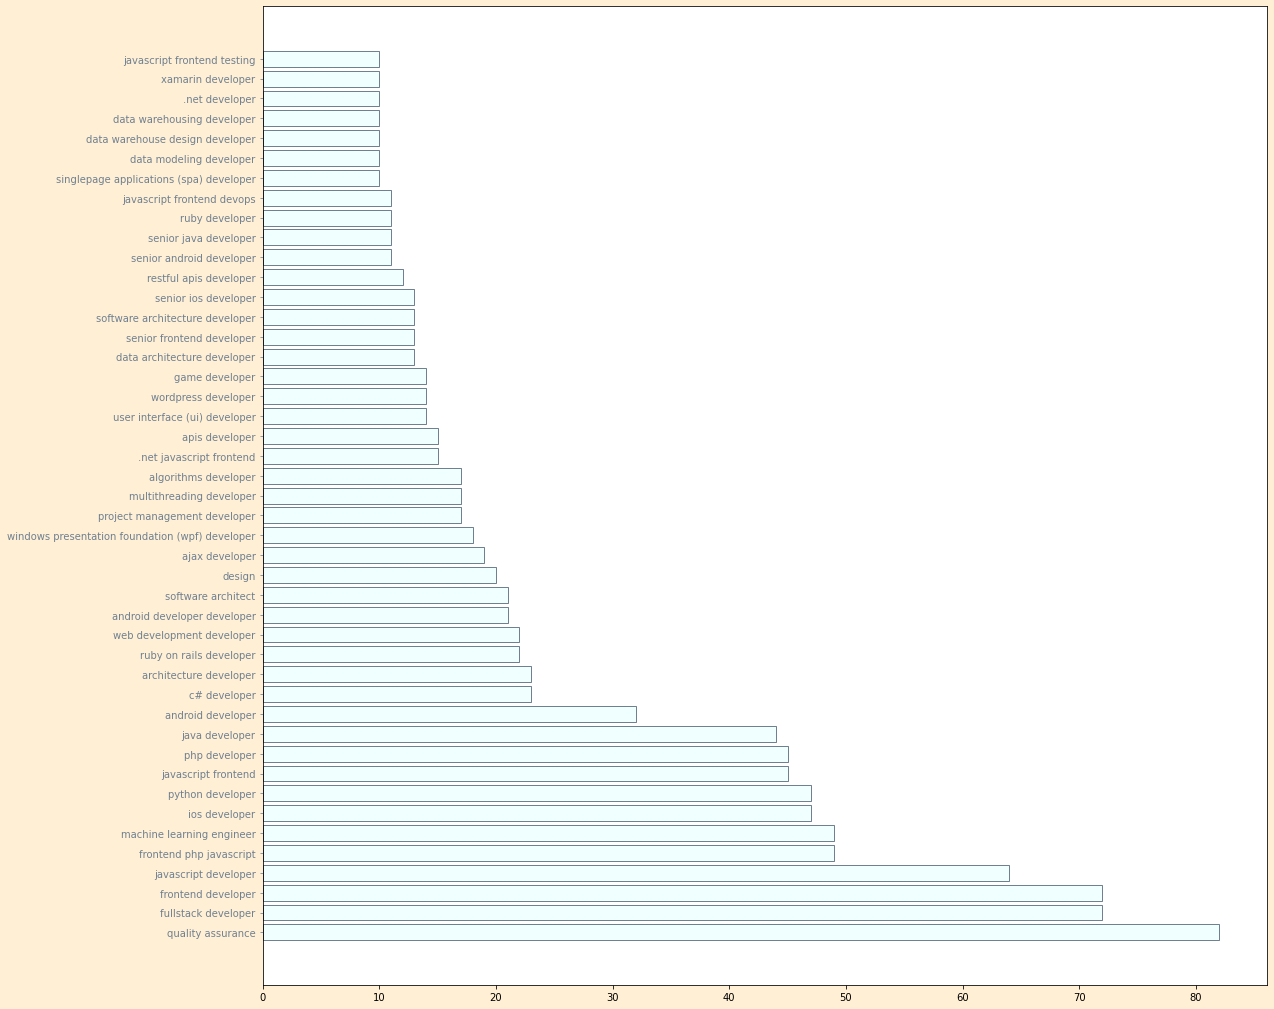

<IPython.core.display.Javascript object>

In [6]:
# Display HBar - @TODO change font!
height = top_profiles["count"]
bars = top_profiles["profile"].to_list()
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111)
ax.set_yticklabels(bars)
ax.tick_params(axis="y", colors="slategrey")
fig.set_facecolor("papayawhip")
plt.barh(bars, height, color="azure", edgecolor="slategrey")
plt.rc("font", size=16)

## Top profile keywords

In [7]:
# Prep Data
top_keywords(df)

profile_keywords  count
0           software   1531
1         javascript    404
2           frontend    341
3                php    159
4          fullstack    157
..               ...    ...
320            spark      1
321           apache      1
322           amazon      1
323     cryptography      1
324             code      1

[325 rows x 2 columns]

<IPython.core.display.Javascript object>

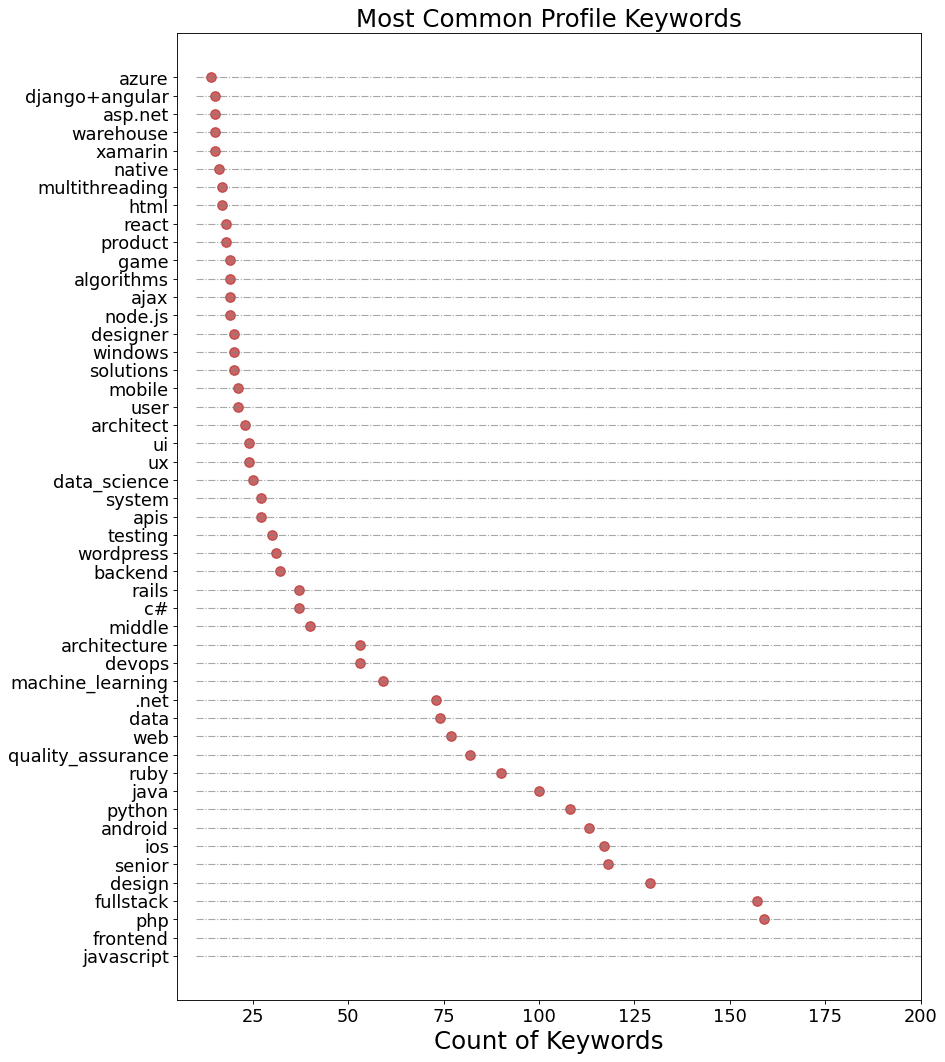

<IPython.core.display.Javascript object>

In [8]:
# Set Data
y = top_keywords(df).profile_keywords[1:50]

# Draw plot
fig, ax = plt.subplots(figsize=(12, 16), dpi=80)
ax.hlines(
    y=y,
    xmin=10,
    xmax=205,
    color="gray",
    alpha=0.7,
    linewidth=1,
    linestyles="dashdot",
)
ax.scatter(
    y=y,
    x=top_keywords(df).loc[1:49, ["count"]],
    s=75,
    color="firebrick",
    alpha=0.7,
)

# Title, Label, Ticks and Ylim
ax.set_title("Most Common Profile Keywords", fontdict={"size": "22"})
ax.set_xlabel("Count of Keywords", fontdict={"size": "22"})
ax.set_yticklabels(y, fontdict={"horizontalalignment": "right", "size": "16"})
ax.set_xlim(5, 200)
plt.show()

## Top skills

In [9]:
# controlling for data type in skills column
df["skills"] = df["skills"].apply(lambda x: "" if type(x) == float else x)
# creating a column containing a list of skills
df["skills_list"] = df["skills"].apply(lambda x: x.split(","))
# extending the column to look at each skill individually
ex_col = df["skills_list"].explode().reset_index()
# getting unique number of skills present in dataset
print("The dataset contains", ex_col["skills_list"].nunique(), "unique skills.")

The dataset contains 788 unique skills.


<IPython.core.display.Javascript object>

In [10]:
comp_df_ = merged_df_(df, ex_col)

<IPython.core.display.Javascript object>

In [11]:
# Prep Data
top_100 = top100skills(df, comp_df_)
# Rename Columns
top_100.rename(columns={"index": "skills", 0: "count"}, inplace=True)
print(top_100)

                  skills  count
43                 html5    414
54              python 3    412
21                   php    401
25               mongodb    397
11               english    386
..                   ...    ...
69                  i os    106
231              cordova    104
45           type script    104
223  mongo db management    104
90            phantom js    103

[100 rows x 2 columns]


<IPython.core.display.Javascript object>

## Average number of skills across profile types

In [12]:
# amongst each type of developer, the average number of skills per developer group
skills_per_developer_profile = (
    comp_df_.groupby(["profile_standardized", "name"])["skills_list_x"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

average_number_of_skills_by_group = (
    skills_per_developer_profile.groupby(["profile_standardized"])["skills_list_x"]
    .agg("mean")
    .astype(int)
    .astype(int)
    .sort_values(ascending=False)
    .reset_index()
)
average_number_of_skills_by_group.drop(7)[:25]

profile_standardized  skills_list_x
0              php devops management            132
1          management php javascript            131
2        marketing design management            114
3             java python javascript            113
4         javascript python frontend            111
5   javascript frontend data_science            100
6         javascript ruby management             95
8                    ios android php             92
9           java python data_science             90
10    javascript python data_science             80
11        python devops data_science             78
12        ruby javascript management             74
13            .net devops javascript             72
14            php javascript android             71
15             php javascript devops             71
16         php javascript management             71
17          javascript ruby frontend             69
18            javascript .net devops             69
19               ruby javascript php             67
20           ruby javascript testing             67
21    javascript frontend management             67
22       javascript frontend testing             65
23           php python data_science             64
24        javascript frontend python             62
25        frontend python javascript             62

<IPython.core.display.Javascript object>

## Jitterplot of skills with top fourteen (14) profiles

In [13]:
# Read Data
comp_df = pd.read_csv("14_profiles_uncrossed.csv")

<IPython.core.display.Javascript object>

In [14]:
# Prep Data
df = jitterplot(comp_df)

<IPython.core.display.Javascript object>

In [15]:
# match skill to its encoding to label Skills to Profiles y-axis
chart_skill_labels = []
n = 99
for i in range(len(df)):
    chart_skill_labels.extend(
        df["skills_list_x"].loc[df["skills_encoded"] == n].unique()
    )
    n -= 1

<IPython.core.display.Javascript object>

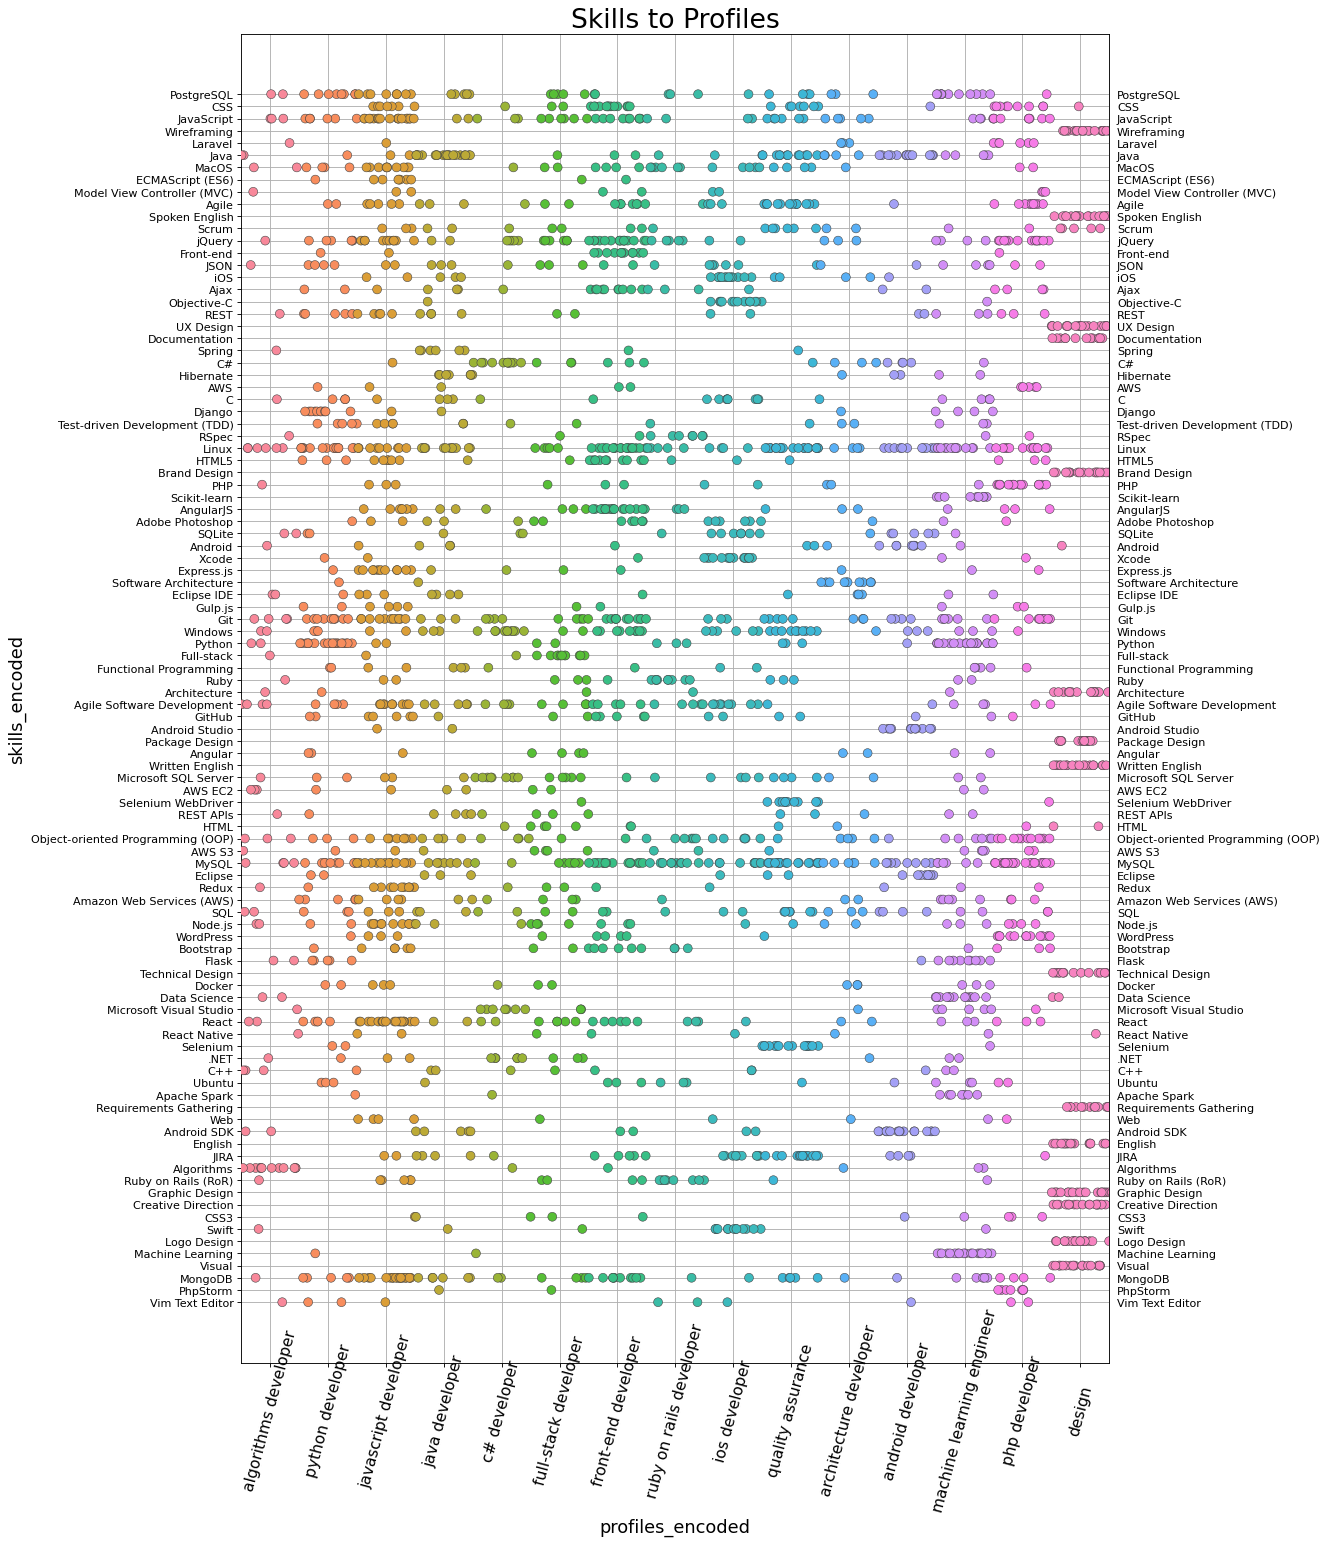

<Figure size 1296x864 with 0 Axes>

<IPython.core.display.Javascript object>

In [16]:
# Generate Jitterplot, using Encoded Skills & Profiles
fig, ax = plt.subplots(figsize=(14, 22), dpi=80)
sns.stripplot(
    x=df.profiles_encoded,
    y=df.skills_encoded,
    jitter=0.5,
    size=8,
    ax=ax,
    linewidth=0.5,
)

plt.yticks(
    range(0, len(df["skills_encoded"].unique())),
    reversed(chart_skill_labels),
    fontsize=10,
)

# match profile to its encoding to label Skills to Profiles x-axis
chart_profile_labels_encoded = [x_tick.get_text() for x_tick in ax.get_xticklabels()]
chart_profile_labels = []
for i in chart_profile_labels_encoded:
    chart_profile_labels.extend(
        df["profile_standardized"].loc[df["profiles_encoded"] == int(i)].unique()
    )

plt.xticks(
    range(0, len(df["profiles_encoded"].unique())),
    chart_profile_labels,
    fontsize=14,
    rotation=75,
    ha="center",
    va="center",
    position=(0, -0.03),
)
plt.title("Skills to Profiles", fontsize=24)
plt.grid(True)
plt.figure(figsize=(18, 12))
ax.tick_params(labelright=True)
plt.show()

## Consider the makeup of each profile with PyWaffle

In [17]:
clean_talentpool = pd.read_csv("../../clean_talentpool_eda.csv")

<IPython.core.display.Javascript object>

In [18]:
five_profiles = pd.concat(
    [
        database_profile(clean_talentpool),
        frontend_profile(clean_talentpool),
        qa_profile(clean_talentpool),
        ml_profile(clean_talentpool),
        fullstack_profile(clean_talentpool),
    ]
)

<IPython.core.display.Javascript object>

In [19]:
clean_df = cleaned_skills_list(five_profiles)

<IPython.core.display.Javascript object>

In [20]:
sub_waffle = waffle_(clean_df)

<IPython.core.display.Javascript object>

In [21]:
# Prep Data
sub_waffle = sub_waffle[1:16]
sub_waffle = sub_waffle.reset_index()
sub_waffle.skills_list = sub_waffle.skills_list.str[1:]
sub_waffle.set_index("skills_list", inplace=True)

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.
findfont: Font family ['36'] not found. Falling back to DejaVu Sans.


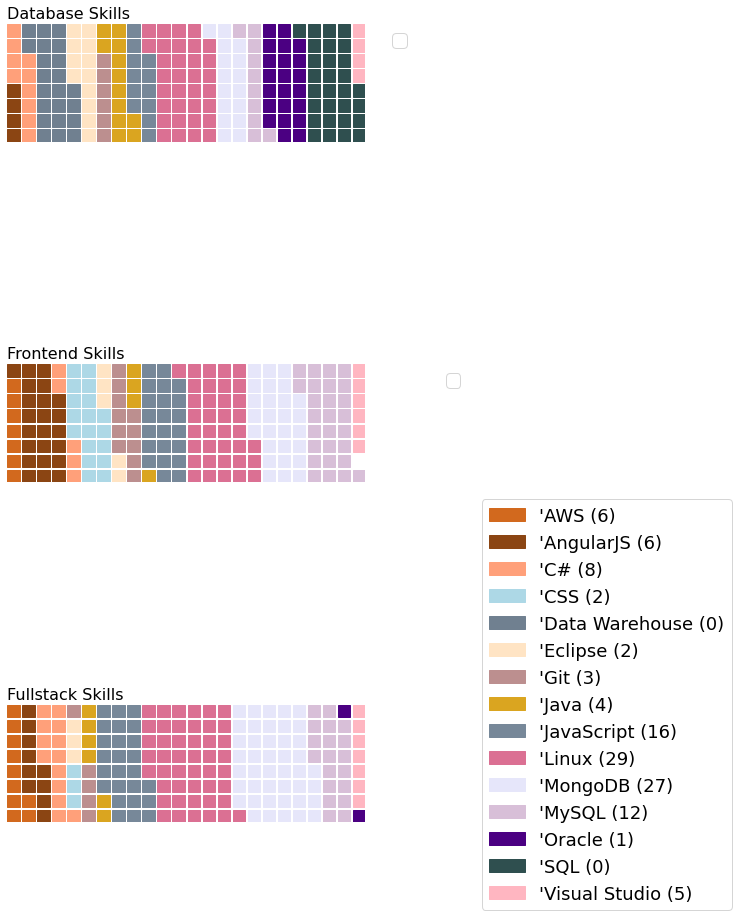

<IPython.core.display.Javascript object>

In [22]:
color = [
    "chocolate",
    "saddlebrown",
    "lightsalmon",
    "lightblue",
    "slategrey",
    "bisque",
    "rosybrown",
    "goldenrod",
    "lightslategrey",
    "palevioletred",
    "lavender",
    "thistle",
    "indigo",
    "darkslategray",
    "lightpink",
]

# waffle subplots
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        "311": {
            "values": sub_waffle["Database"],
            "legend": {
                "labels": "",
                "loc": "upper left",
                "bbox_to_anchor": (1.05, 1),
                "fontsize": 18,
            },
            "colors": color,
            "title": {"label": "Database Skills", "loc": "left", "font": "36"},
        },
        "312": {
            "values": sub_waffle["Frontend"],
            "legend": {
                "labels": "",
                "loc": "upper left",
                "bbox_to_anchor": (1.2, 1),
                "fontsize": 18,
            },
            "colors": color,
            "title": {"label": "Frontend Skills", "loc": "left", "font": "36"},
        },
        "313": {
            "values": sub_waffle["Fullstack"],
            "labels": [f"{k} ({v})" for k, v in sub_waffle["Fullstack"].items()],
            "legend": {
                "loc": "center left",
                "bbox_to_anchor": (1.3, 1),
                "fontsize": 18,
            },
            "colors": color,
            "title": {"label": "Fullstack Skills", "loc": "left", "font": "36"},
        },
    },
    rows=8,
    columns=24,
    figsize=(18, 12),
)

## Squarify skill distribution

In [23]:
df_groupby = pd.read_csv("../../profiles_grouped_by_skills.csv")

<IPython.core.display.Javascript object>

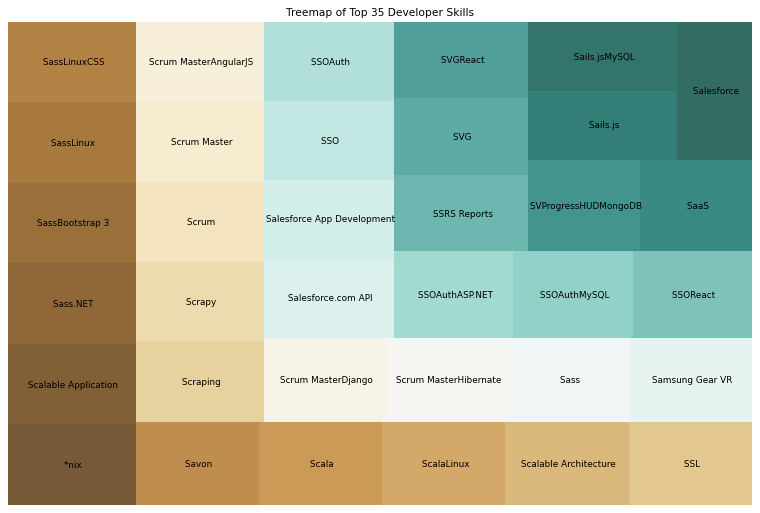

<IPython.core.display.Javascript object>

In [65]:
fullstack = squarified_skill(df_groupby, "fullstack")
treemap(fullstack)

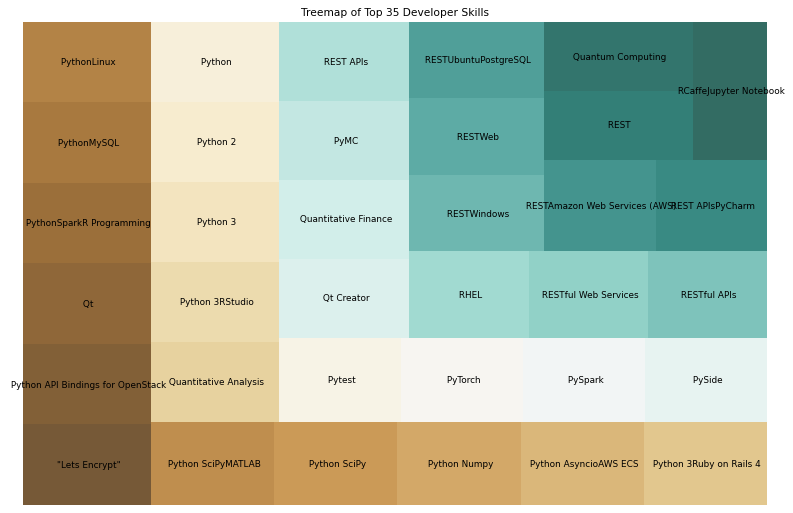

<IPython.core.display.Javascript object>

In [66]:
machine_learning = squarified_skill(df_groupby, "machine")
treemap(machine_learning)

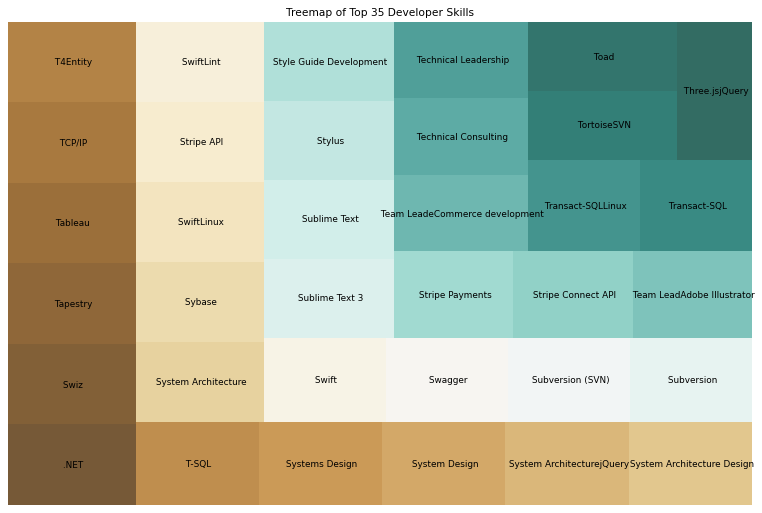

<IPython.core.display.Javascript object>

In [67]:
design = squarified_skill(df_groupby, "design")
treemap(design)

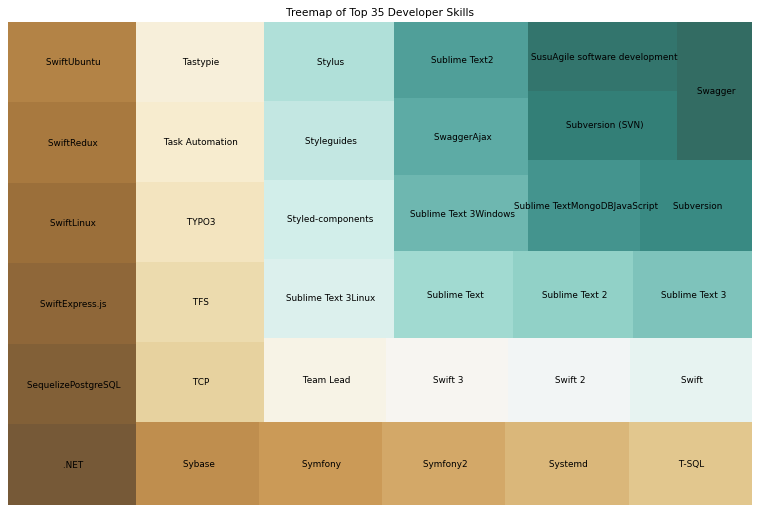

<IPython.core.display.Javascript object>

In [68]:
javascript = squarified_skill(df_groupby, "javascript")
treemap(javascript)

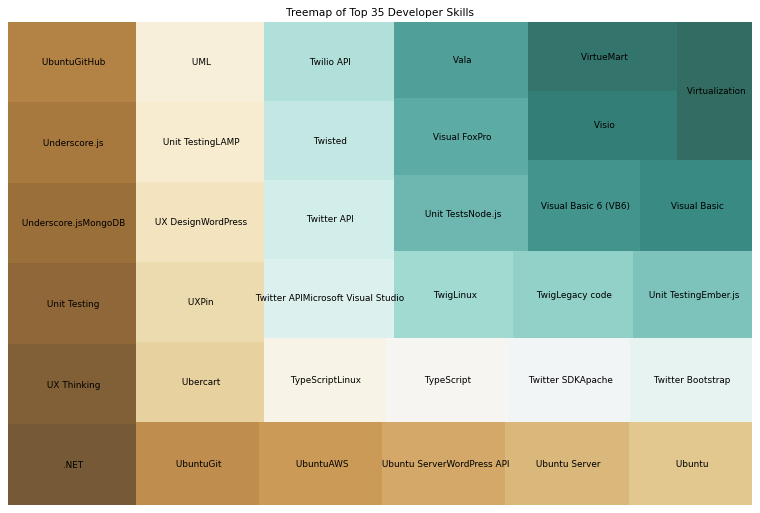

<IPython.core.display.Javascript object>

In [69]:
php = squarified_skill(df_groupby, "php")
treemap(php)

## Heatmap of skills against skills

In [29]:
# reading in csv of data whose features have been reduced to yield optimal results
data = pd.read_csv("../../5_profiles/reduced_dim_5.csv")

<IPython.core.display.Javascript object>

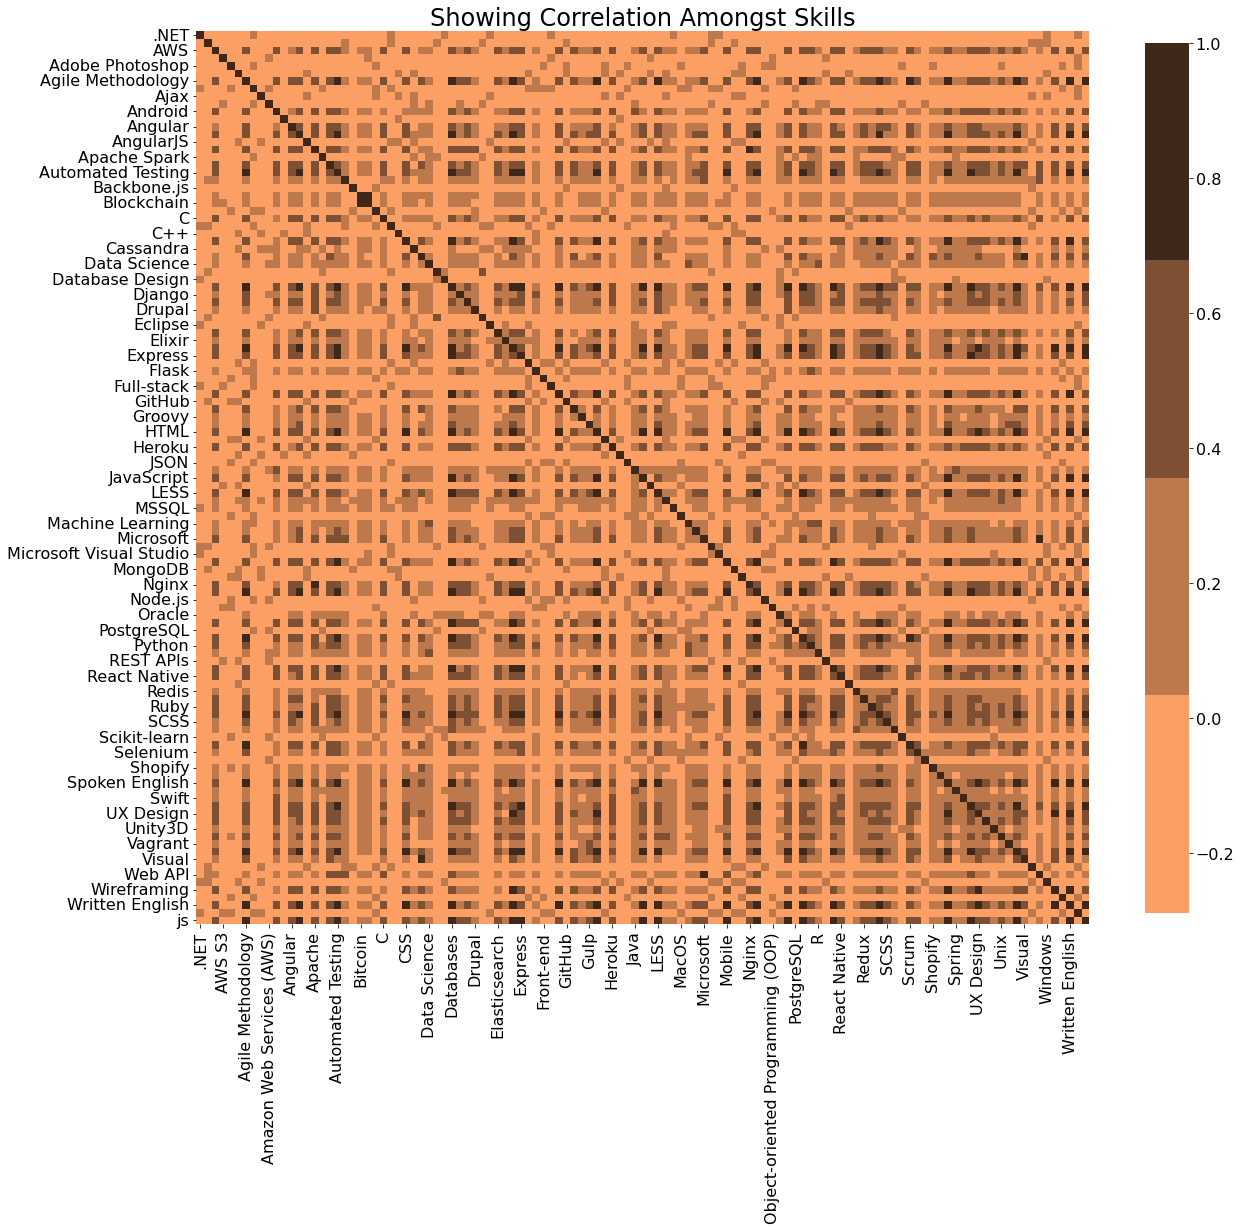

<IPython.core.display.Javascript object>

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))

data_corr = data.corr()
cmap = sns.mpl_palette("copper_r", 4)

# Generate a Heatmap
sns.heatmap(data_corr, cbar_kws={"shrink": 0.8}, square=True, cmap=cmap)

# title
title = "Showing Correlation Amongst Skills"
# plt.xticks(ha="center", va="center", position=(0, -0.08), rotation=85)
plt.title(title, loc="center", fontsize=24)
plt.show()

### This clearly demonstrates that skills are not correlated to each other. Which means they are adding information to the dataset.

## Compare skill heatmaps

In [31]:
df = pd.read_csv("k_means.csv")

<IPython.core.display.Javascript object>

In [32]:
corr_matrix = heatmap(df)
# drop nan row
df = df[1:]

<IPython.core.display.Javascript object>

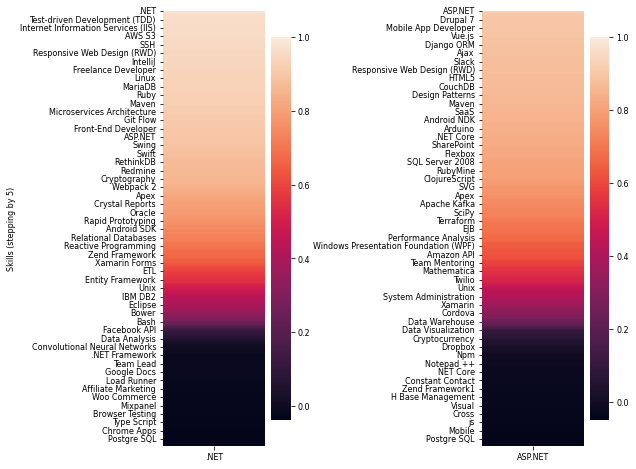

<IPython.core.display.Javascript object>

In [64]:
fig, ax = plt.subplots(
    ncols=2,
    figsize=(8, 8),
    gridspec_kw=dict(width_ratios=[3.5, 3.5]),
    constrained_layout=False,
)
# gridspec_kw=dict(width_ratios=[4,1,0.2])
a = sns.heatmap(
    corr_matrix[[".NET"]].sort_values(by=[".NET"], ascending=False),
    ax=ax[0],
)
b = sns.heatmap(
    corr_matrix[["ASP.NET"]].sort_values(by=["ASP.NET"], ascending=False),
    ax=ax[1],
)
a.set(ylabel="Skills (stepping by 5)")
b.set(ylabel=None)
a.set(xlabel=None)
b.set(xlabel=None)
plt.subplots_adjust(wspace=1.5)
plt.rc("font", size=8)

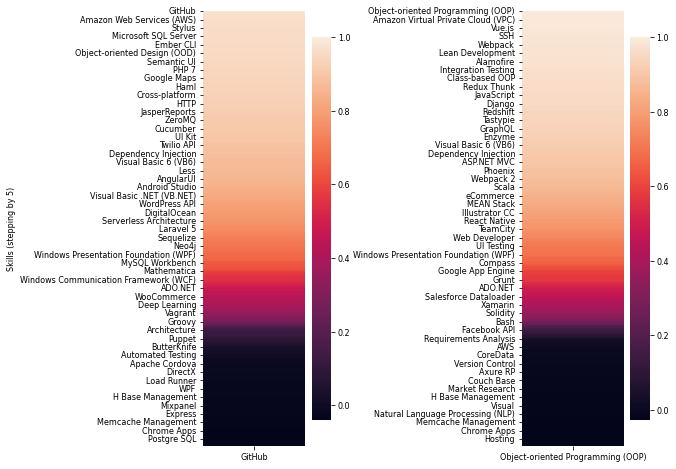

<IPython.core.display.Javascript object>

In [34]:
fig, ax = plt.subplots(
    ncols=2,
    figsize=(8, 8),
    gridspec_kw=dict(width_ratios=[3.5, 3.5]),
    constrained_layout=False,
)
# gridspec_kw=dict(width_ratios=[4,1,0.2])
a = sns.heatmap(
    corr_matrix[["GitHub"]].sort_values(by=["GitHub"], ascending=False),
    ax=ax[0],
)
b = sns.heatmap(
    corr_matrix[["Object-oriented Programming (OOP)"]].sort_values(
        by=["Object-oriented Programming (OOP)"], ascending=False
    ),
    ax=ax[1],
)
a.set(ylabel="Skills (stepping by 5)")
b.set(ylabel=None)
a.set(xlabel=None)
b.set(xlabel=None)
plt.subplots_adjust(wspace=1.5)
plt.rc("font", size=8)

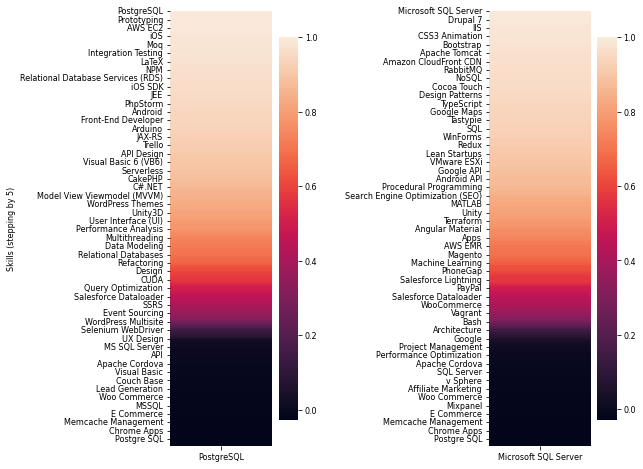

<IPython.core.display.Javascript object>

In [35]:
fig, ax = plt.subplots(
    ncols=2,
    figsize=(8, 8),
    gridspec_kw=dict(width_ratios=[3.5, 3.5]),
    constrained_layout=False,
)
# gridspec_kw=dict(width_ratios=[4,1,0.2])
a = sns.heatmap(
    corr_matrix[["PostgreSQL"]].sort_values(by=["PostgreSQL"], ascending=False),
    ax=ax[0],
)
b = sns.heatmap(
    corr_matrix[["Microsoft SQL Server"]].sort_values(
        by=["Microsoft SQL Server"], ascending=False
    ),
    ax=ax[1],
)
a.set(ylabel="Skills (stepping by 5)")
b.set(ylabel=None)
a.set(xlabel=None)
b.set(xlabel=None)
plt.subplots_adjust(wspace=1.5)
plt.rc("font", size=8)

## Distribution of skills amongst one profile

In [36]:
# Prep Data
normal_dist_df = jitterplot(comp_df)

<IPython.core.display.Javascript object>

In [37]:
# subset the df and counting freq of skills amongst backend developers
frontend_df = prep_data_distribution("front-end developer")

<IPython.core.display.Javascript object>

In [38]:
# calculate Z-score col
frontend_df["zscore"] = stats.zscore(frontend_df["freq"])

<IPython.core.display.Javascript object>

In [39]:
labels = []  # create labels for normal distribution graph
for item in frontend_df.sort_values(by=["skills_encoded"], ascending=False)[
    "skills_list_x"
].tolist():
    if item not in labels:
        labels.append(item)

<IPython.core.display.Javascript object>

In [40]:
# top 10 most frequently occurring skills seen with front-end developer profiles
frontend_df[frontend_df["zscore"] > 0]["skills_list_x"].unique()

array(['AngularJS', 'Linux', 'jQuery', 'MySQL', 'CSS', 'Git', 'HTML5',
       'Front-end', 'MongoDB', 'Ajax'], dtype=object)

<IPython.core.display.Javascript object>

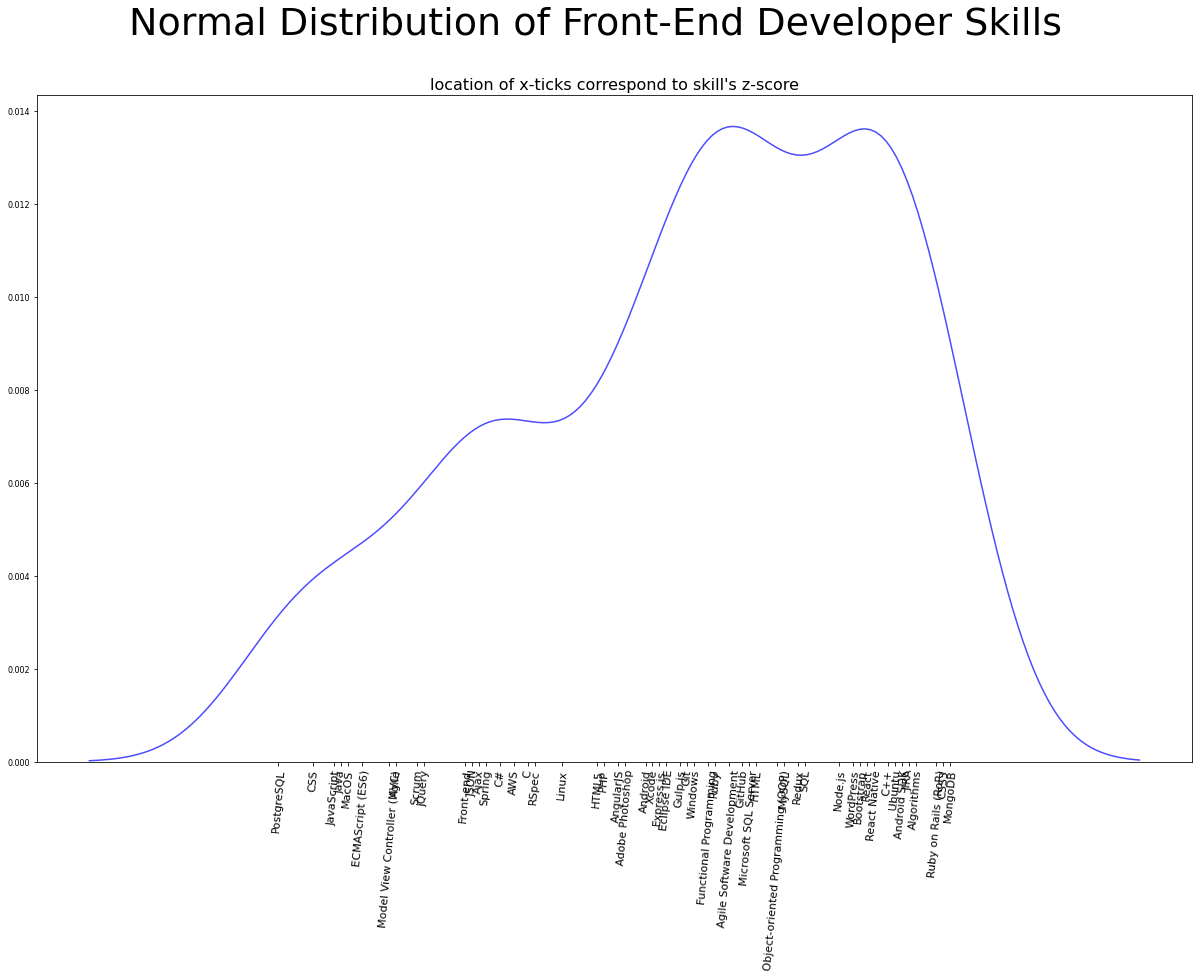

<IPython.core.display.Javascript object>

In [41]:
dims = (20.7, 12.27)
fig, ax = plt.subplots(figsize=dims)
sns.kdeplot(frontend_df["skills_encoded"], color="b", alpha=0.7)
plt.xticks(
    list(set(frontend_df["skills_encoded"].tolist())), labels, fontsize=11, rotation=85
)
plt.xlabel("")
plt.ylabel("")
plt.suptitle("Normal Distribution of Front-End Developer Skills", fontsize=38)
plt.title("location of x-ticks correspond to skill's z-score", fontsize=16)
plt.show()

#### It's difficult to understand which skills are causing the bump in density seen with the graph. To see this a different way, we can plot these skills as a normal distribution according to their zscores.

In [42]:
# labels to add to x-axis
labels = []
for z in sorted(list(set(frontend_df["zscore"]))):
    labels.extend(
        list(frontend_df["skills_list_x"].loc[frontend_df["zscore"] == z].unique())
    )

<IPython.core.display.Javascript object>

In [43]:
# order labels
zscores = []
for label in create_labels(labels):
    zscores.extend(
        list(
            set(frontend_df.loc[frontend_df["skills_list_x"] == label]["zscore"].values)
        )
    )

<IPython.core.display.Javascript object>

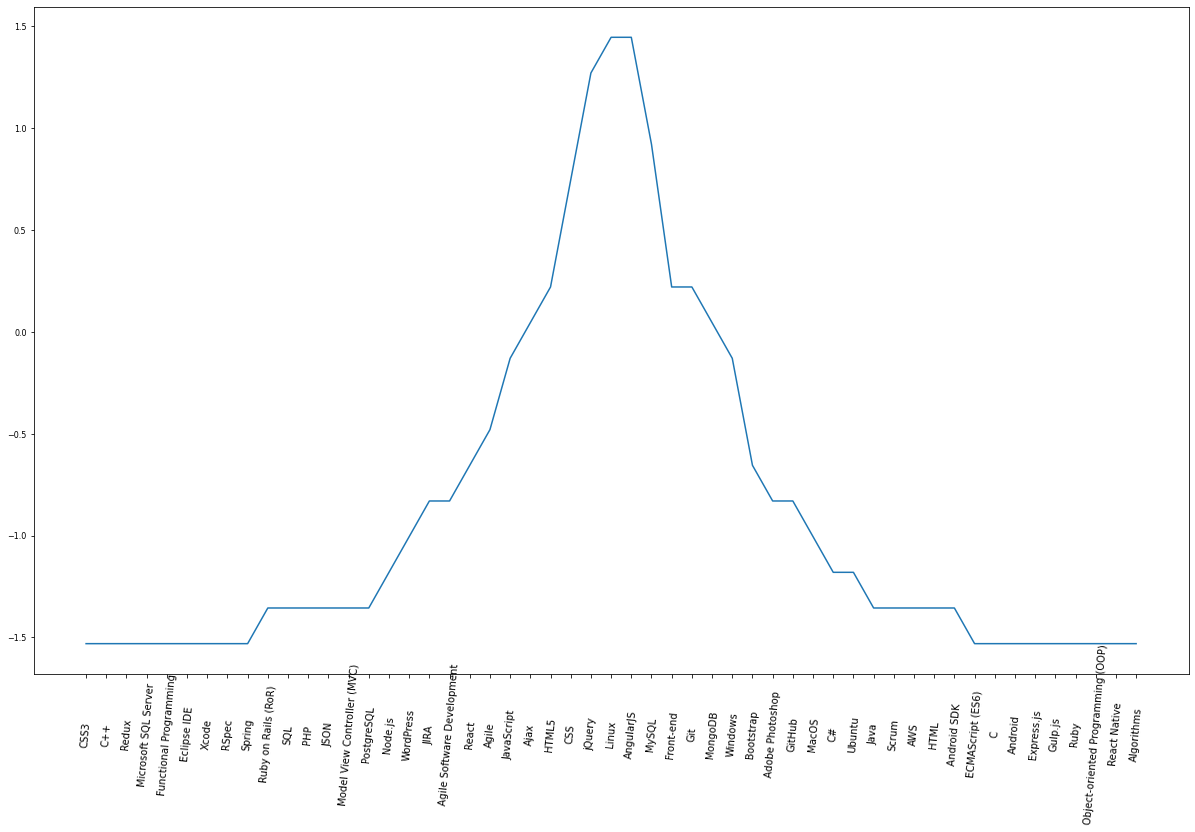

<IPython.core.display.Javascript object>

In [44]:
dims = (20.7, 12.27)

fig, ax = plt.subplots(figsize=dims)
plt.xticks(
    range(len(labels)),
    create_labels(labels),
    rotation=85,
    ha="center",
    va="center",
    position=(0, -0.08),
    fontsize=10,
)
plt.plot(create_labels(labels), zscores)
# p = plt.scatter(list(set(frontend_df["skills_encoded"].tolist())), color="b", alpha=0.7)

## Compare skill distributions between two (2) profiles

In [45]:
profiles = normal_dist_df["profile_standardized"].unique()
data = []
for idx, dev in enumerate(profiles):
    data.append(create_zscore_col(dev))
zscore_df = pd.concat(data).drop("index", axis=1)

<IPython.core.display.Javascript object>

In [46]:
# generate zscore dfs of names and their corresponding encoded values
zscore_pivot_encoded = zscore_df.pivot(
    columns="profile_standardized", values="skills_encoded"
).dropna()

zscore_pivot_names = zscore_df.pivot(
    columns="profile_standardized", values="skills_list_x"
).dropna()

<IPython.core.display.Javascript object>

In [47]:
zscore_df.profile_standardized.unique()

array(['machine learning engineer', 'android developer',
       'front-end developer', 'php developer', 'c# developer',
       'quality assurance', 'architecture developer',
       'ruby on rails developer', 'full-stack developer',
       'python developer', 'ios developer', 'java developer',
       'algorithms developer', 'javascript developer', 'design'],
      dtype=object)

<IPython.core.display.Javascript object>

### Android v. IOS

In [48]:
df, rug1, rug2 = distplot_comparison("android developer", "ios developer")

<IPython.core.display.Javascript object>

In [49]:
rug_text = [rug1, rug2]

hist_data = [
    np.array(df["android developer"]),
    np.array(df["ios developer"]),
]
group_labels = df.columns
colors = ["#765e67", "#3bc3ae"]

fig = ff.create_distplot(
    hist_data,
    group_labels,
    show_hist=False,
    rug_text=rug_text,
    colors=colors,
)

# add title
fig.update_layout(title_text="Android v. IOS DistPlot")
fig.show()

<IPython.core.display.Javascript object>

### PHP v. Front-End

In [50]:
df, rug1, rug2 = distplot_comparison("front-end developer", "php developer")

<IPython.core.display.Javascript object>

In [51]:
rug_text = [rug1, rug2]

hist_data = [
    np.array(df["front-end developer"]),
    np.array(df["php developer"]),
]
group_labels = list(df.columns)
colors = ["#c9878f", "#e1c699"]

fig = ff.create_distplot(
    hist_data,
    group_labels,
    show_hist=False,
    rug_text=rug_text,
    colors=colors,
)

# add title
fig.update_layout(title_text="PHP v. Front-End DistPlot")
fig.show()

<IPython.core.display.Javascript object>

### Java v. C#

In [52]:
df, rug1, rug2 = distplot_comparison("c# developer", "java developer")

<IPython.core.display.Javascript object>

In [53]:
rug_text = [rug1, rug2]

hist_data = [
    np.array(df["c# developer"]),
    np.array(df["java developer"]),
]
group_labels = list(df.columns)
colors = ["#ffa3a3", "#99b7b0"]

fig = ff.create_distplot(
    hist_data,
    group_labels,
    show_hist=False,
    rug_text=rug_text,
    colors=colors,
)

# add title
fig.update_layout(title_text="Java v. C# DistPlot")
fig.show()

<IPython.core.display.Javascript object>

## Compare all profile distributions

In [54]:
zscore_df = zscore_df.replace(
    {"Object-oriented Programming (OOP)": "Object-Oriented Programming"}
)

<IPython.core.display.Javascript object>

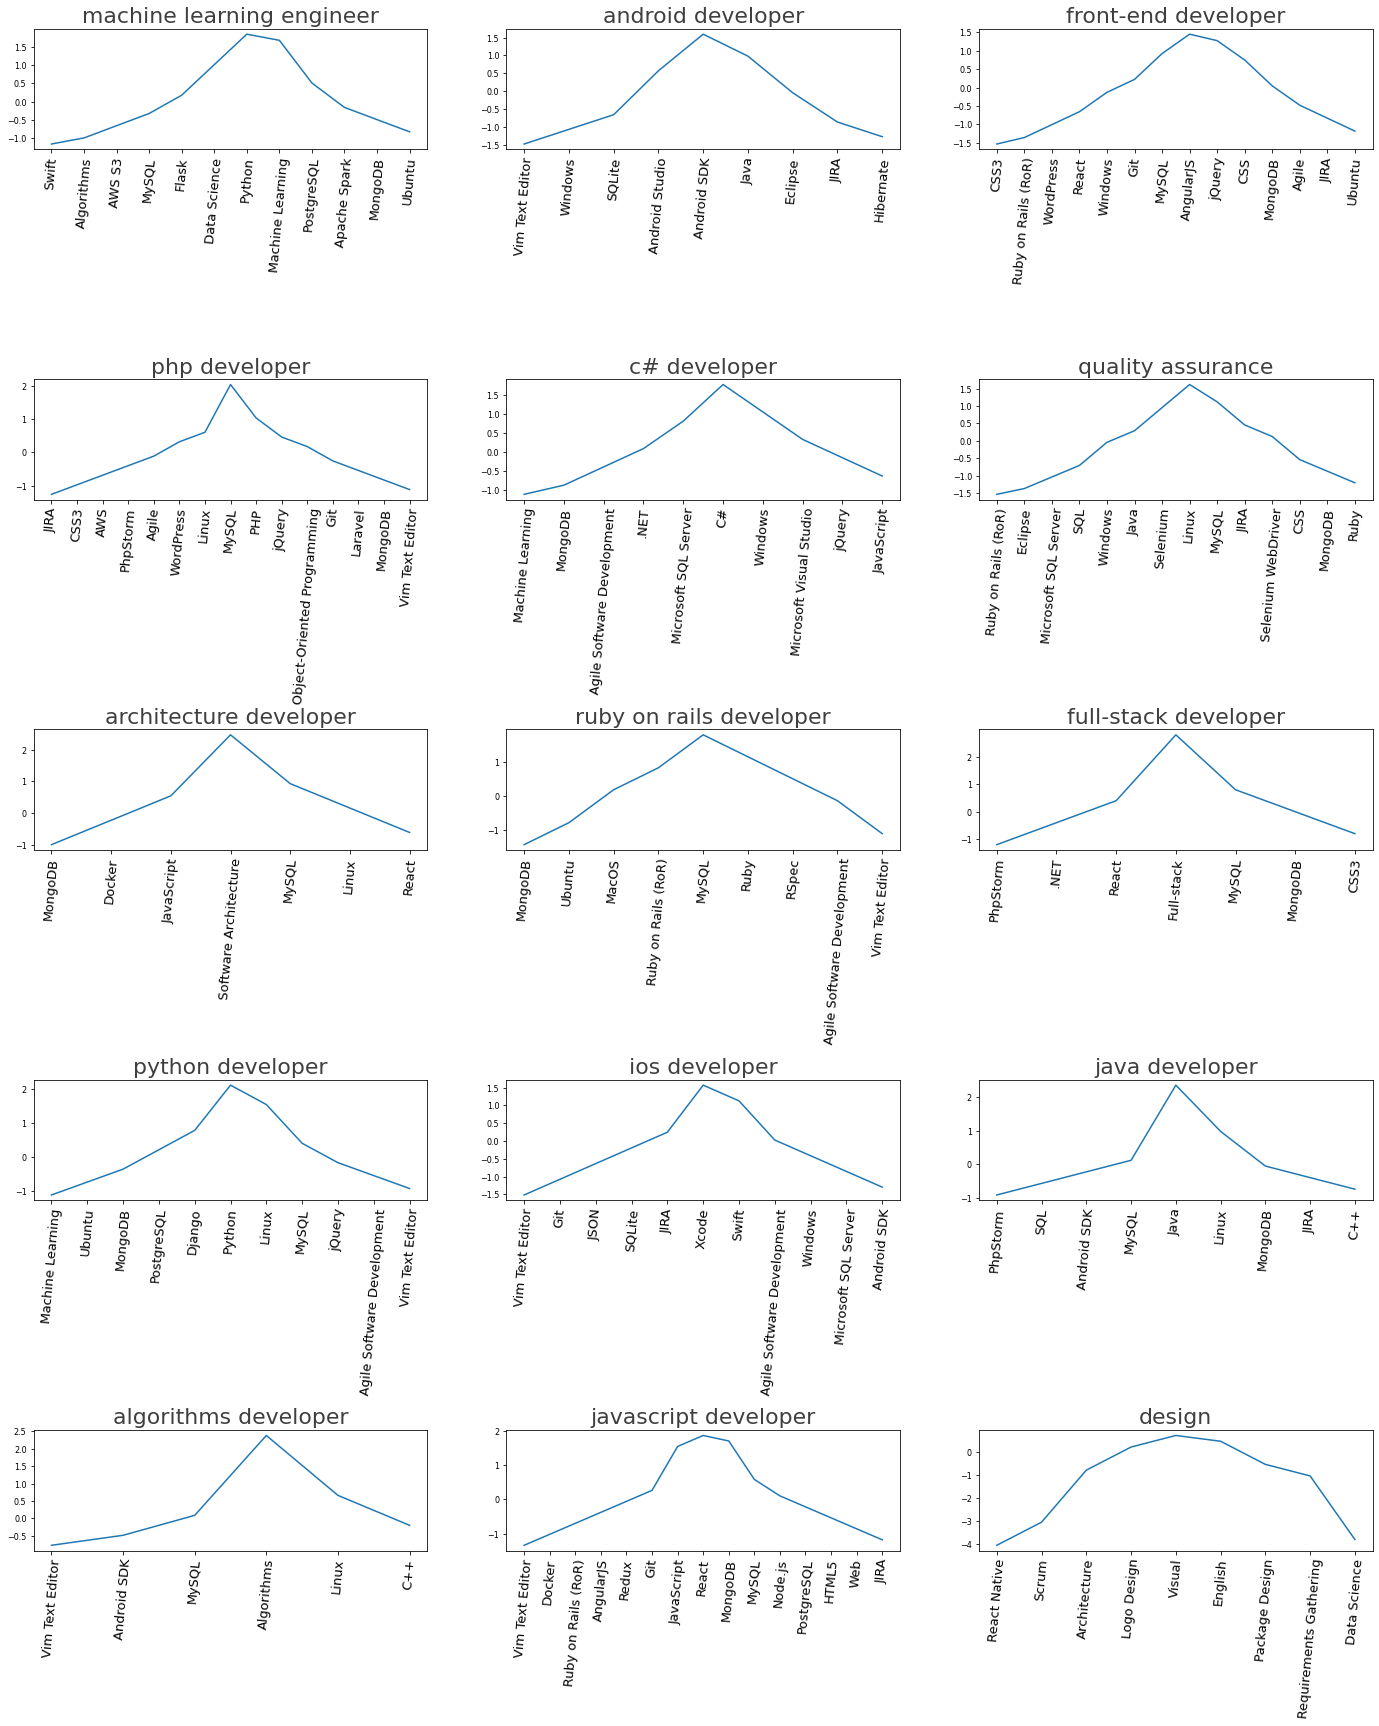

<IPython.core.display.Javascript object>

In [55]:
# get days to plot
profiles = zscore_df["profile_standardized"].unique()
fig = plt.figure(figsize=(24, 28))
gs = gridspec.GridSpec(5, 3, hspace=1.9, wspace=0.2)

for idx, dev in enumerate(profiles):
    ax = fig.add_subplot(gs[idx])
    dfz = zscore_df.loc[zscore_df["profile_standardized"] == dev]
    # create labels
    labels = []
    for i in sorted(normal_dist(dfz["Zscore"])):
        skills = list(dfz["skills_list_x"].loc[dfz["Zscore"] == i].unique())
        if len(skills) > 1:
            if skills[0] != "Object-Oriented Programming":
                labels.append(skills[0])
            else:
                labels.append(skills[1])
        else:
            labels.extend(skills)
    bell = create_labels(labels)
    x = range(len(normal_dist(dfz["Zscore"])))
    y = normal_dist(dfz["Zscore"])
    plt.plot(x, y)
    plt.xticks(
        range(len(normal_dist(dfz["Zscore"]))),
        bell,
        rotation=85,
        fontsize=13,
    )
    plt.title(dev, fontsize=22, alpha=0.75)

## Plot timezones

In [56]:
df = pd.read_csv("web_export.csv", sep=";")

<IPython.core.display.Javascript object>

In [57]:
# remove NAN values
timezone_df = df[~(df["Timezone"].isna())]

<IPython.core.display.Javascript object>

In [58]:
# split on first space and assign second element to df row
for idx, row in timezone_df["Timezone"].items():
    row = row.split(" ", 1)
    if len(row) > 1:
        timezone_df.at[idx, "Timezone"] = row[1]

<IPython.core.display.Javascript object>

In [59]:
# replace space with _
for idx, row in timezone_df["Timezone"].items():
    timezone_df.at[idx, "Timezone"] = row.replace(" ", "_")

<IPython.core.display.Javascript object>

In [60]:
# subset to eliminate truncated timezones
timezone_df = timezone_df[~timezone_df["Timezone"].str.contains("UTC|GMT")]

<IPython.core.display.Javascript object>

In [61]:
# create needed data
timezone_df["dt"] = timezone_df["Timezone"].apply(lambda t: pd.Timestamp.now(t))
timezone_df["utcoffset"] = timezone_df["dt"].apply(lambda t: t.utcoffset())

timezone_df = timezone_df.sort_values("utcoffset", ascending=True).reset_index()

<IPython.core.display.Javascript object>

In [62]:
# count num_developers per timezone
tz_count = pd.DataFrame(timezone_df.groupby(["Timezone", "utcoffset"])["dt"].count())
tz_count.reset_index(inplace=True)
tz_count = (
    tz_count.sort_values("utcoffset", ascending=True)
    .rename({"dt": "count"}, axis=1)
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [63]:
fig = px.line(
    tz_count,
    x="Timezone",
    y="count",
    title="Number of Developers per Timezone (ordered from west to east)",
)
fig.show()

<IPython.core.display.Javascript object>